<a href="https://colab.research.google.com/github/edwinmorenon-lang/Sistemas-de-produccion-con-python/blob/main/Electiva%20tecnia%20ll%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# ============================================
# ENTREGA 3 - OPTIMIZACIÓN + ROI + GRAFO
# ============================================

!pip install pandas matplotlib networkx python-docx --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import re


In [21]:
file_path = "/content/base de datos lectiva tecnica 2 _ 3ª corte.xls - Sheet1.csv"  # Reemplazado con el archivo CSV real

df = pd.read_csv(file_path, encoding="latin-1")
df.head()

,Documento,Fecha,Desc. item,Costo entradas (prom.),Costo MP (ent),Costo unitario (prom.),DIRECCION,TIEMPO,DISTANCIA A CASA MATRIZ,RazÃ³n social tercero,...,Costo MP EN (ent),Costo MP EN (sal),Costo neto (est.),Costo neto (prom.),Verificado,Cargue,Costo MO NP (sal),Costo MP NP (sal),Item ensamble,Item resumen
0,EA -00006194,2/09/2024,PIÃA,"$114.600,00","$114.600,00","$5.730,00",KRRA 62 NÂº 64-75,28 MIN,14 KM,GECOAGRO SAS,...,"$114.600,00","$0,00","$0,00","$114.600,00",No requiere,,"$0,00","$0,00",,00000713 PIÃA
1,EA -00006194,2/09/2024,CILANTRO,"$70.000,00","$70.000,00","$3.500,00",KRRA 62 NÂº 64-75,28 MIN,14 KM,GECOAGRO SAS,...,"$70.000,00","$0,00","$0,00","$70.000,00",No requiere,,"$0,00","$0,00",,00000703 CILANTRO
2,EA -00006202,2/09/2024,AGUACATE HASS X KG,"$2.626.140,00","$2.626.140,00","$4.600,00",SILVANIA CUNDINAMARCA,2 H,74 KM,ORGANICS PRODUCTS VASGAR SAS,...,"$2.626.140,00","$0,00","$0,00","$2.626.140,00",No requiere,,"$0,00","$0,00",,00000696 AGUACATE HASS X KG
3,EA -00006193,2/09/2024,PIÃA,"$63.112,00","$63.112,00","$4.207,47",NaN,NaN,NaN,ABADIA CLAUDIA MILENA,...,"$63.112,00","$0,00","$0,00","$63.112,00",No requiere,,"$0,00","$0,00",,00000713 PIÃA
4,EA -00006193,2/09/2024,TOMATE,"$1.058.400,00","$1.058.400,00","$2.646,00",NaN,NaN,NaN,ABADIA CLAUDIA MILENA,...,"$1.058.400,00","$0,00","$0,00","$1.058.400,00",No requiere,,"$0,00","$0,00",,00000716 TOMATE


In [22]:
import pandas as pd

file_path = "/content/base de datos lectiva tecnica 2 _ 3ª corte.xls - Sheet1.csv"
df = pd.read_csv(file_path, encoding="latin-1")
display(df.head())

,Documento,Fecha,Desc. item,Costo entradas (prom.),Costo MP (ent),Costo unitario (prom.),DIRECCION,TIEMPO,DISTANCIA A CASA MATRIZ,RazÃ³n social tercero,...,Costo MP EN (ent),Costo MP EN (sal),Costo neto (est.),Costo neto (prom.),Verificado,Cargue,Costo MO NP (sal),Costo MP NP (sal),Item ensamble,Item resumen
0,EA -00006194,2/09/2024,PIÃA,"$114.600,00","$114.600,00","$5.730,00",KRRA 62 NÂº 64-75,28 MIN,14 KM,GECOAGRO SAS,...,"$114.600,00","$0,00","$0,00","$114.600,00",No requiere,,"$0,00","$0,00",,00000713 PIÃA
1,EA -00006194,2/09/2024,CILANTRO,"$70.000,00","$70.000,00","$3.500,00",KRRA 62 NÂº 64-75,28 MIN,14 KM,GECOAGRO SAS,...,"$70.000,00","$0,00","$0,00","$70.000,00",No requiere,,"$0,00","$0,00",,00000703 CILANTRO
2,EA -00006202,2/09/2024,AGUACATE HASS X KG,"$2.626.140,00","$2.626.140,00","$4.600,00",SILVANIA CUNDINAMARCA,2 H,74 KM,ORGANICS PRODUCTS VASGAR SAS,...,"$2.626.140,00","$0,00","$0,00","$2.626.140,00",No requiere,,"$0,00","$0,00",,00000696 AGUACATE HASS X KG
3,EA -00006193,2/09/2024,PIÃA,"$63.112,00","$63.112,00","$4.207,47",NaN,NaN,NaN,ABADIA CLAUDIA MILENA,...,"$63.112,00","$0,00","$0,00","$63.112,00",No requiere,,"$0,00","$0,00",,00000713 PIÃA
4,EA -00006193,2/09/2024,TOMATE,"$1.058.400,00","$1.058.400,00","$2.646,00",NaN,NaN,NaN,ABADIA CLAUDIA MILENA,...,"$1.058.400,00","$0,00","$0,00","$1.058.400,00",No requiere,,"$0,00","$0,00",,00000716 TOMATE


In [23]:
import os

file_path = "/content/base de datos lectiva tecnica 2 _ 3ª corte.xls - Sheet1.csv"

if os.path.exists(file_path):
    print(f"The file '{file_path}' exists.")
else:
    print(f"The file '{file_path}' does NOT exist. Please ensure it's uploaded to /content/.")

The file '/content/base de datos lectiva tecnica 2 _ 3ª corte.xls - Sheet1.csv' exists.


In [24]:
def tiempo_a_minutos(s):
    if pd.isna(s): return None
    s = str(s).upper()

    h = re.search(r"(\d+)\s*H", s)
    m = re.search(r"(\d+)\s*MIN", s)

    total = 0
    if h: total += int(h.group(1)) * 60
    if m: total += int(m.group(1))

    return total if total > 0 else None

df["Tiempo_min"] = df["TIEMPO"].apply(tiempo_a_minutos)
df.head()


,Documento,Fecha,Desc. item,Costo entradas (prom.),Costo MP (ent),Costo unitario (prom.),DIRECCION,TIEMPO,DISTANCIA A CASA MATRIZ,RazÃ³n social tercero,...,Costo MP EN (sal),Costo neto (est.),Costo neto (prom.),Verificado,Cargue,Costo MO NP (sal),Costo MP NP (sal),Item ensamble,Item resumen,Tiempo_min
0,EA -00006194,2/09/2024,PIÃA,"$114.600,00","$114.600,00","$5.730,00",KRRA 62 NÂº 64-75,28 MIN,14 KM,GECOAGRO SAS,...,"$0,00","$0,00","$114.600,00",No requiere,,"$0,00","$0,00",,00000713 PIÃA,28.0
1,EA -00006194,2/09/2024,CILANTRO,"$70.000,00","$70.000,00","$3.500,00",KRRA 62 NÂº 64-75,28 MIN,14 KM,GECOAGRO SAS,...,"$0,00","$0,00","$70.000,00",No requiere,,"$0,00","$0,00",,00000703 CILANTRO,28.0
2,EA -00006202,2/09/2024,AGUACATE HASS X KG,"$2.626.140,00","$2.626.140,00","$4.600,00",SILVANIA CUNDINAMARCA,2 H,74 KM,ORGANICS PRODUCTS VASGAR SAS,...,"$0,00","$0,00","$2.626.140,00",No requiere,,"$0,00","$0,00",,00000696 AGUACATE HASS X KG,120.0
3,EA -00006193,2/09/2024,PIÃA,"$63.112,00","$63.112,00","$4.207,47",NaN,NaN,NaN,ABADIA CLAUDIA MILENA,...,"$0,00","$0,00","$63.112,00",No requiere,,"$0,00","$0,00",,00000713 PIÃA,NaN
4,EA -00006193,2/09/2024,TOMATE,"$1.058.400,00","$1.058.400,00","$2.646,00",NaN,NaN,NaN,ABADIA CLAUDIA MILENA,...,"$0,00","$0,00","$1.058.400,00",No requiere,,"$0,00","$0,00",,00000716 TOMATE,NaN


In [25]:
print(df.columns)

Index(['Documento', 'Fecha', 'Desc. item', 'Costo entradas (prom.)',
       'Costo MP (ent)', 'Costo unitario (prom.)', 'DIRECCION', 'TIEMPO',
       'DISTANCIA   A CASA MATRIZ', 'RazÃ³n social tercero', 'Fecha creaciÃ³n',
       'Entradas (inv.)', 'Salidas (inv.)', 'Neto (inv.)',
       'Fecha contabilizaciÃ³n', 'Lote', 'Actividad', 'Bodega', 'Desc. Pais',
       'Costo MP (sal)', 'Costo MP EN (ent)', 'Costo MP EN (sal)',
       'Costo neto (est.)', 'Costo neto (prom.)', 'Verificado', 'Cargue',
       'Costo MO NP (sal)', 'Costo MP NP (sal)', 'Item ensamble',
       'Item resumen', 'Tiempo_min'],
      dtype='object')


In [26]:
def tiempo_a_minutos(s):
    if pd.isna(s): return None
    s = str(s).upper()

    h = re.search(r"(\d+)\s*H", s)
    m = re.search(r"(\d+)\s*MIN", s)

    total = 0
    if h: total += int(h.group(1)) * 60
    if m: total += int(m.group(1))

    return total if total > 0 else None

df["Tiempo_min"] = df["TIEMPO"].apply(tiempo_a_minutos)

df_grouped = df.groupby('RazÃ³n social tercero')['Tiempo_min'].agg(Tiempo_mediana='median', Tiempo_promedio='mean').reset_index()
final_df = df_grouped.dropna(subset=['Tiempo_mediana'])
final_df = final_df.rename(columns={'RazÃ³n social tercero': 'Proveedor'})

G = nx.DiGraph()
planta = "Casa Matriz (El Carnal)"

for _, r in final_df.iterrows():
    G.add_edge(r["Proveedor"], planta, weight=r["Tiempo_mediana"])

# Dijkstra
paths = []
for _, r in final_df.iterrows():
    prov = r["Proveedor"]
    path = nx.dijkstra_path(G, prov, planta)
    dist = nx.dijkstra_path_length(G, prov, planta)
    paths.append((prov, dist, path))

paths_df = pd.DataFrame(paths, columns=["Proveedor","Tiempo_opt_min","Ruta"])
final_df = final_df.merge(paths_df, on="Proveedor")

In [27]:
final_df["Ahorro_min"] = final_df["Tiempo_promedio"] - final_df["Tiempo_opt_min"]
final_df["Ahorro_%"] = (final_df["Ahorro_min"] / final_df["Tiempo_promedio"]) * 100

final_df = final_df.sort_values("Ahorro_min", ascending=False)
final_df.head(10)

,Proveedor,Tiempo_mediana,Tiempo_promedio,Tiempo_opt_min,Ruta,Ahorro_min,Ahorro_%
0,AGROINVERSIONES DON MATIAS SAS,18.0,18.0,18.0,"[AGROINVERSIONES DON MATIAS SAS, Casa Matriz (...",0.0,0.0
1,ALIMONT FOOD SERVICES SAS,5.0,5.0,5.0,"[ALIMONT FOOD SERVICES SAS, Casa Matriz (El Ca...",0.0,0.0
2,COMPAÃÃA MANUFACTURERA DE PAN COMAPAN SA,39.0,39.0,39.0,"[COMPAÃÃA MANUFACTURERA DE PAN COMAPAN SA, C...",0.0,0.0
3,FAGARC TRADE SAS,35.0,35.0,35.0,"[FAGARC TRADE SAS, Casa Matriz (El Carnal)]",0.0,0.0
4,GECOAGRO SAS,28.0,28.0,28.0,"[GECOAGRO SAS, Casa Matriz (El Carnal)]",0.0,0.0
5,IMPRESCALA SAS,24.0,24.0,24.0,"[IMPRESCALA SAS, Casa Matriz (El Carnal)]",0.0,0.0
6,INVERAVES NORTE SAS,25.0,25.0,25.0,"[INVERAVES NORTE SAS, Casa Matriz (El Carnal)]",0.0,0.0
7,INVERSIONES AGROPECUARIAS LOM SAS,274.0,274.0,274.0,"[INVERSIONES AGROPECUARIAS LOM SAS, Casa Matri...",0.0,0.0
8,LA ESTACION CARNICA SAS,18.0,18.0,18.0,"[LA ESTACION CARNICA SAS, Casa Matriz (El Carn...",0.0,0.0
9,MEGACHORIZOS SAS,56.0,56.0,56.0,"[MEGACHORIZOS SAS, Casa Matriz (El Carnal)]",0.0,0.0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


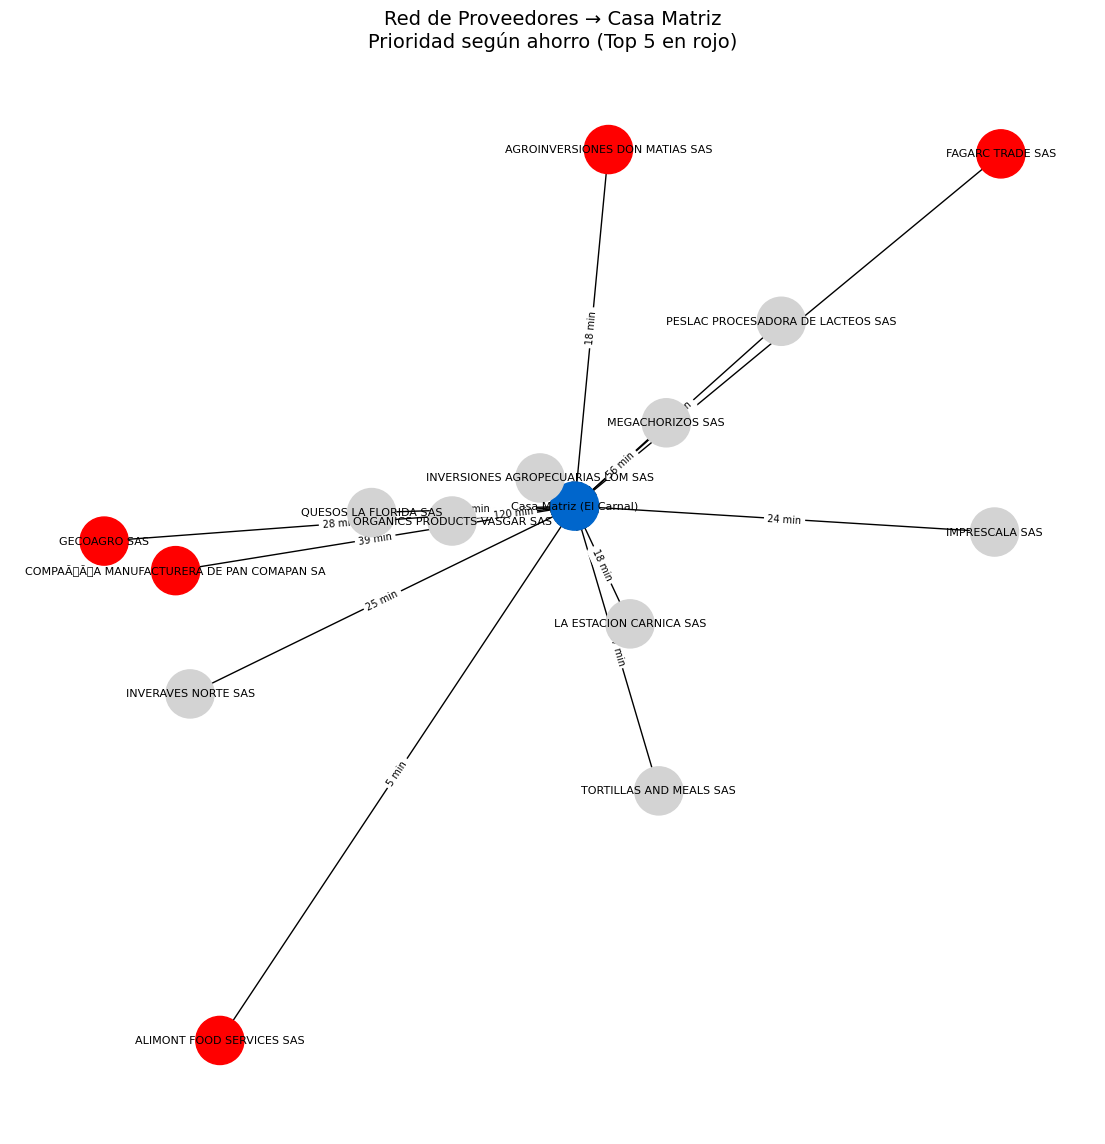

In [28]:
top5 = final_df.head(5)

plt.figure(figsize=(14,14))
pos = nx.spring_layout(G, seed=42)

# Casa Matriz al centro
pos[planta] = np.array([0, 0])

node_colors = []
for node in G.nodes():
    if node == planta:
        node_colors.append("#0066CC")
    elif node in list(top5["Proveedor"]):
        node_colors.append("red")   # priorizados
    else:
        node_colors.append("lightgray")

nx.draw_networkx_nodes(G, pos, node_size=1200, node_color=node_colors)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=18)

edge_labels = {(prov, planta): f"{int(t)} min"
               for prov, t in zip(final_df["Proveedor"], final_df["Tiempo_opt_min"])}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Red de Proveedores → Casa Matriz\nPrioridad según ahorro (Top 5 en rojo)", fontsize=14)
plt.axis("off")
plt.show()


In [29]:
precio_diesel = 10785
precio_gasolina = 16439

consumo_diesel_Lmin = 0.10
consumo_gasolina_Lmin = 0.05

viajes_dia = 5
dias_anio = 260

costo_implementacion = 3000000  # 3M COP


In [30]:
final_df["Ahorro_anual_min"] = final_df["Ahorro_min"] * viajes_dia * dias_anio

final_df["Ahorro_diesel_COP"] = final_df["Ahorro_anual_min"] * consumo_diesel_Lmin * precio_diesel
final_df["Ahorro_gasolina_COP"] = final_df["Ahorro_anual_min"] * consumo_gasolina_Lmin * precio_gasolina

display(final_df.head())

,Proveedor,Tiempo_mediana,Tiempo_promedio,Tiempo_opt_min,Ruta,Ahorro_min,Ahorro_%,Ahorro_anual_min,Ahorro_diesel_COP,Ahorro_gasolina_COP
0,AGROINVERSIONES DON MATIAS SAS,18.0,18.0,18.0,"[AGROINVERSIONES DON MATIAS SAS, Casa Matriz (...",0.0,0.0,0.0,0.0,0.0
1,ALIMONT FOOD SERVICES SAS,5.0,5.0,5.0,"[ALIMONT FOOD SERVICES SAS, Casa Matriz (El Ca...",0.0,0.0,0.0,0.0,0.0
2,COMPAÃÃA MANUFACTURERA DE PAN COMAPAN SA,39.0,39.0,39.0,"[COMPAÃÃA MANUFACTURERA DE PAN COMAPAN SA, C...",0.0,0.0,0.0,0.0,0.0
3,FAGARC TRADE SAS,35.0,35.0,35.0,"[FAGARC TRADE SAS, Casa Matriz (El Carnal)]",0.0,0.0,0.0,0.0,0.0
4,GECOAGRO SAS,28.0,28.0,28.0,"[GECOAGRO SAS, Casa Matriz (El Carnal)]",0.0,0.0,0.0,0.0,0.0


In [31]:
display(final_df.head())

,Proveedor,Tiempo_mediana,Tiempo_promedio,Tiempo_opt_min,Ruta,Ahorro_min,Ahorro_%,Ahorro_anual_min,Ahorro_diesel_COP,Ahorro_gasolina_COP
0,AGROINVERSIONES DON MATIAS SAS,18.0,18.0,18.0,"[AGROINVERSIONES DON MATIAS SAS, Casa Matriz (...",0.0,0.0,0.0,0.0,0.0
1,ALIMONT FOOD SERVICES SAS,5.0,5.0,5.0,"[ALIMONT FOOD SERVICES SAS, Casa Matriz (El Ca...",0.0,0.0,0.0,0.0,0.0
2,COMPAÃÃA MANUFACTURERA DE PAN COMAPAN SA,39.0,39.0,39.0,"[COMPAÃÃA MANUFACTURERA DE PAN COMAPAN SA, C...",0.0,0.0,0.0,0.0,0.0
3,FAGARC TRADE SAS,35.0,35.0,35.0,"[FAGARC TRADE SAS, Casa Matriz (El Carnal)]",0.0,0.0,0.0,0.0,0.0
4,GECOAGRO SAS,28.0,28.0,28.0,"[GECOAGRO SAS, Casa Matriz (El Carnal)]",0.0,0.0,0.0,0.0,0.0


In [42]:
# ============================================
# Re-initializing environment for correct execution
# ============================================

!pip install pandas matplotlib networkx python-docx --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import re

file_path = "/content/base de datos lectiva tecnica 2 _ 3ª corte.xls - Sheet1.csv"  # Reemplazado con el archivo CSV real

df = pd.read_csv(file_path, encoding="latin-1")

def tiempo_a_minutos(s):
    if pd.isna(s): return None
    s = str(s).upper()

    h = re.search(r"(\d+)\s*H", s)
    m = re.search(r"(\d+)\s*MIN", s)

    total = 0
    if h: total += int(h.group(1)) * 60
    if m: total += int(m.group(1))

    return total if total > 0 else None

df["Tiempo_min"] = df["TIEMPO"].apply(tiempo_a_minutos)

df_grouped = df.groupby('RazÃ³n social tercero')['Tiempo_min'].agg(Tiempo_mediana='median', Tiempo_promedio='mean').reset_index()
final_df = df_grouped.dropna(subset=['Tiempo_mediana'])
final_df = final_df.rename(columns={'RazÃ³n social tercero': 'Proveedor'})

G = nx.DiGraph()
planta = "Casa Matriz (El Carnal)"

for _, r in final_df.iterrows():
    G.add_edge(r["Proveedor"], planta, weight=r["Tiempo_mediana"])

# Dijkstra
paths = []
for _, r in final_df.iterrows():
    prov = r["Proveedor"]
    path = nx.dijkstra_path(G, prov, planta)
    dist = nx.dijkstra_path_length(G, prov, planta)
    paths.append((prov, dist, path))

paths_df = pd.DataFrame(paths, columns=["Proveedor","Tiempo_opt_min","Ruta"])
final_df = final_df.merge(paths_df, on="Proveedor")

final_df["Ahorro_min"] = final_df["Tiempo_promedio"] - final_df["Tiempo_opt_min"]
final_df["Ahorro_%"] = (final_df["Ahorro_min"] / final_df["Tiempo_promedio"]) * 100

final_df = final_df.sort_values("Ahorro_min", ascending=False)

precio_diesel = 10785
precio_gasolina = 16439

consumo_diesel_Lmin = 0.10
consumo_gasolina_Lmin = 0.05

viajes_dia = 5
dias_anio = 260

costo_implementacion = 3000000  # 3M COP

final_df["Ahorro_anual_min"] = final_df["Ahorro_min"] * viajes_dia * dias_anio

final_df["Ahorro_diesel_COP"] = final_df["Ahorro_anual_min"] * consumo_diesel_Lmin * precio_diesel
final_df["Ahorro_gasolina_COP"] = final_df["Ahorro_anual_min"] * consumo_gasolina_Lmin * precio_gasolina

trafico = 1.15

final_df["Ahorro_diesel_trafico"] = final_df["Ahorro_diesel_COP"] * trafico
final_df["ROI_diesel"] = (final_df["Ahorro_diesel_COP"] - costo_implementacion) / costo_implementacion * 100
final_df["ROI_gasolina"] = (final_df["Ahorro_gasolina_COP"] - costo_implementacion) / costo_implementacion * 100
final_df["ROI_diesel_trafico"] = (final_df["Ahorro_diesel_trafico"] - costo_implementacion) / costo_implementacion * 100

display(final_df.head())

,Proveedor,Tiempo_mediana,Tiempo_promedio,Tiempo_opt_min,Ruta,Ahorro_min,Ahorro_%,Ahorro_anual_min,Ahorro_diesel_COP,Ahorro_gasolina_COP,Ahorro_diesel_trafico,ROI_diesel,ROI_gasolina,ROI_diesel_trafico
0,AGROINVERSIONES DON MATIAS SAS,18.0,18.0,18.0,"[AGROINVERSIONES DON MATIAS SAS, Casa Matriz (...",0.0,0.0,0.0,0.0,0.0,0.0,-100.0,-100.0,-100.0
1,ALIMONT FOOD SERVICES SAS,5.0,5.0,5.0,"[ALIMONT FOOD SERVICES SAS, Casa Matriz (El Ca...",0.0,0.0,0.0,0.0,0.0,0.0,-100.0,-100.0,-100.0
2,COMPAÃÃA MANUFACTURERA DE PAN COMAPAN SA,39.0,39.0,39.0,"[COMPAÃÃA MANUFACTURERA DE PAN COMAPAN SA, C...",0.0,0.0,0.0,0.0,0.0,0.0,-100.0,-100.0,-100.0
3,FAGARC TRADE SAS,35.0,35.0,35.0,"[FAGARC TRADE SAS, Casa Matriz (El Carnal)]",0.0,0.0,0.0,0.0,0.0,0.0,-100.0,-100.0,-100.0
4,GECOAGRO SAS,28.0,28.0,28.0,"[GECOAGRO SAS, Casa Matriz (El Carnal)]",0.0,0.0,0.0,0.0,0.0,0.0,-100.0,-100.0,-100.0


In [33]:
file_path = "/content/base de datos lectiva tecnica 2 _ 3ª corte.xls - Sheet1.csv"  # Reemplazado con el archivo CSV real

df = pd.read_csv(file_path, encoding="latin-1")
df.head()

,Documento,Fecha,Desc. item,Costo entradas (prom.),Costo MP (ent),Costo unitario (prom.),DIRECCION,TIEMPO,DISTANCIA A CASA MATRIZ,RazÃ³n social tercero,...,Costo MP EN (ent),Costo MP EN (sal),Costo neto (est.),Costo neto (prom.),Verificado,Cargue,Costo MO NP (sal),Costo MP NP (sal),Item ensamble,Item resumen
0,EA -00006194,2/09/2024,PIÃA,"$114.600,00","$114.600,00","$5.730,00",KRRA 62 NÂº 64-75,28 MIN,14 KM,GECOAGRO SAS,...,"$114.600,00","$0,00","$0,00","$114.600,00",No requiere,,"$0,00","$0,00",,00000713 PIÃA
1,EA -00006194,2/09/2024,CILANTRO,"$70.000,00","$70.000,00","$3.500,00",KRRA 62 NÂº 64-75,28 MIN,14 KM,GECOAGRO SAS,...,"$70.000,00","$0,00","$0,00","$70.000,00",No requiere,,"$0,00","$0,00",,00000703 CILANTRO
2,EA -00006202,2/09/2024,AGUACATE HASS X KG,"$2.626.140,00","$2.626.140,00","$4.600,00",SILVANIA CUNDINAMARCA,2 H,74 KM,ORGANICS PRODUCTS VASGAR SAS,...,"$2.626.140,00","$0,00","$0,00","$2.626.140,00",No requiere,,"$0,00","$0,00",,00000696 AGUACATE HASS X KG
3,EA -00006193,2/09/2024,PIÃA,"$63.112,00","$63.112,00","$4.207,47",NaN,NaN,NaN,ABADIA CLAUDIA MILENA,...,"$63.112,00","$0,00","$0,00","$63.112,00",No requiere,,"$0,00","$0,00",,00000713 PIÃA
4,EA -00006193,2/09/2024,TOMATE,"$1.058.400,00","$1.058.400,00","$2.646,00",NaN,NaN,NaN,ABADIA CLAUDIA MILENA,...,"$1.058.400,00","$0,00","$0,00","$1.058.400,00",No requiere,,"$0,00","$0,00",,00000716 TOMATE


In [34]:
def tiempo_a_minutos(s):
    if pd.isna(s): return None
    s = str(s).upper()

    h = re.search(r"(\d+)\s*H", s)
    m = re.search(r"(\d+)\s*MIN", s)

    total = 0
    if h: total += int(h.group(1)) * 60
    if m: total += int(m.group(1))

    return total if total > 0 else None

df["Tiempo_min"] = df["TIEMPO"].apply(tiempo_a_minutos)

df_grouped = df.groupby('RazÃ³n social tercero')['Tiempo_min'].agg(Tiempo_mediana='median', Tiempo_promedio='mean').reset_index()
final_df = df_grouped.dropna(subset=['Tiempo_mediana'])
final_df = final_df.rename(columns={'RazÃ³n social tercero': 'Proveedor'})

G = nx.DiGraph()
planta = "Casa Matriz (El Carnal)"

for _, r in final_df.iterrows():
    G.add_edge(r["Proveedor"], planta, weight=r["Tiempo_mediana"])

# Dijkstra
paths = []
for _, r in final_df.iterrows():
    prov = r["Proveedor"]
    path = nx.dijkstra_path(G, prov, planta)
    dist = nx.dijkstra_path_length(G, prov, planta)
    paths.append((prov, dist, path))

paths_df = pd.DataFrame(paths, columns=["Proveedor","Tiempo_opt_min","Ruta"])
final_df = final_df.merge(paths_df, on="Proveedor")

In [35]:
final_df["Ahorro_min"] = final_df["Tiempo_promedio"] - final_df["Tiempo_opt_min"]
final_df["Ahorro_%"] = (final_df["Ahorro_min"] / final_df["Tiempo_promedio"]) * 100

final_df = final_df.sort_values("Ahorro_min", ascending=False)
final_df.head(10)

,Proveedor,Tiempo_mediana,Tiempo_promedio,Tiempo_opt_min,Ruta,Ahorro_min,Ahorro_%
0,AGROINVERSIONES DON MATIAS SAS,18.0,18.0,18.0,"[AGROINVERSIONES DON MATIAS SAS, Casa Matriz (...",0.0,0.0
1,ALIMONT FOOD SERVICES SAS,5.0,5.0,5.0,"[ALIMONT FOOD SERVICES SAS, Casa Matriz (El Ca...",0.0,0.0
2,COMPAÃÃA MANUFACTURERA DE PAN COMAPAN SA,39.0,39.0,39.0,"[COMPAÃÃA MANUFACTURERA DE PAN COMAPAN SA, C...",0.0,0.0
3,FAGARC TRADE SAS,35.0,35.0,35.0,"[FAGARC TRADE SAS, Casa Matriz (El Carnal)]",0.0,0.0
4,GECOAGRO SAS,28.0,28.0,28.0,"[GECOAGRO SAS, Casa Matriz (El Carnal)]",0.0,0.0
5,IMPRESCALA SAS,24.0,24.0,24.0,"[IMPRESCALA SAS, Casa Matriz (El Carnal)]",0.0,0.0
6,INVERAVES NORTE SAS,25.0,25.0,25.0,"[INVERAVES NORTE SAS, Casa Matriz (El Carnal)]",0.0,0.0
7,INVERSIONES AGROPECUARIAS LOM SAS,274.0,274.0,274.0,"[INVERSIONES AGROPECUARIAS LOM SAS, Casa Matri...",0.0,0.0
8,LA ESTACION CARNICA SAS,18.0,18.0,18.0,"[LA ESTACION CARNICA SAS, Casa Matriz (El Carn...",0.0,0.0
9,MEGACHORIZOS SAS,56.0,56.0,56.0,"[MEGACHORIZOS SAS, Casa Matriz (El Carnal)]",0.0,0.0


In [44]:
final_df["ROI_diesel"] = (final_df["Ahorro_diesel_COP"] - costo_implementacion) / costo_implementacion * 100
final_df["ROI_gasolina"] = (final_df["Ahorro_gasolina_COP"] - costo_implementacion) / costo_implementacion * 100


In [45]:
trafico = 1.15

final_df["Ahorro_diesel_trafico"] = final_df["Ahorro_diesel_COP"] * trafico
final_df["ROI_diesel_trafico"] = (final_df["Ahorro_diesel_trafico"] - costo_implementacion) / costo_implementacion * 100
